# House Price Prediction: Advanced Regression Techniques- Data Wrangling

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

Data Loading and Overview: The notebook starts by downloading the dataset using the Kaggle API and loading the train and test data into separate DataFrames. It then combines the two DataFrames into a single DataFrame called full_df for further analysis.

In [2]:
# Import necessary modules

import requests
import pandas as pd
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

In [3]:
# Using the kaggle api to download the dataset

od.download(
    "https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=train.csv"
)

Skipping, found downloaded files in ".\house-prices-advanced-regression-techniques" (use force=True to force download)


<IPython.core.display.Javascript object>

In [4]:
# Load train.csv into a DataFrame
train_df = pd.read_csv("train.csv")

# Load test.csv into a DataFrame
test_df = pd.read_csv("test.csv")

<IPython.core.display.Javascript object>

Now we have the dataframes made for the training and testing datasets and will take a look at the data

In [5]:
# New dataframe with the combined datasets in order to view all of the data

full_df = pd.concat([train_df, test_df], ignore_index=True)
full_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


<IPython.core.display.Javascript object>

In [6]:
full_df.set_index("Id", inplace=True)

<IPython.core.display.Javascript object>

In [7]:
# Print out the first row transposed for sample home submission

full_df.iloc[0].T

MSSubClass             60
MSZoning               RL
LotFrontage          65.0
LotArea              8450
Street               Pave
                   ...   
MoSold                  2
YrSold               2008
SaleType               WD
SaleCondition      Normal
SalePrice        208500.0
Name: 1, Length: 80, dtype: object

<IPython.core.display.Javascript object>

# Data Preprocessing

The preprocessing section handles missing values in the dataset. It begins by setting the 'Id' column as the index and provides an overview of the missing values by counting the number of missing values in each column and their percentages. Specific columns with missing values, such as 'PoolQC', 'MiscFeature', 'Alley', and 'Utilities', are addressed by either dropping the columns or creating new columns based on the presence or absence of certain features.

In [8]:
# Count the number of missing values in each column and then sort. Count column shows us the number of instances that are
# missing and the % will show the percent of each column missing

missing = pd.concat([full_df.isnull().sum(), 100 * full_df.isnull().mean()], axis=1)
missing.columns = ["count", "%"]
missing.sort_values(by="count", ascending=False)

,count,%
PoolQC,2909,99.657417
MiscFeature,2814,96.402878
Alley,2721,93.216855
Fence,2348,80.438506
SalePrice,1459,49.982871
...,...,...
1stFlrSF,0,0.000000
2ndFlrSF,0,0.000000
LowQualFinSF,0,0.000000
GrLivArea,0,0.000000


<IPython.core.display.Javascript object>

In [9]:
# Pool quality has the most missing values. We will check what the unique missing values are and the counts of each.

poolqc_counts = full_df["PoolQC"].value_counts()
print(poolqc_counts)

Ex    4
Gd    4
Fa    2
Name: PoolQC, dtype: int64


<IPython.core.display.Javascript object>

In [10]:
# Drop the pool quality column with very little information to help us

full_df = full_df.drop("PoolQC", axis=1)

<IPython.core.display.Javascript object>

In [11]:
misc_feature_counts = full_df["MiscFeature"].value_counts()
print(misc_feature_counts)

Shed    95
Gar2     5
Othr     4
TenC     1
Name: MiscFeature, dtype: int64


<IPython.core.display.Javascript object>

In [12]:
# Create a new column 'HasShed' indicating the presence of a shed as most non missing values of misc feature are shed

full_df["HasShed"] = full_df["MiscFeature"].apply(lambda x: 1 if x == "Shed" else 0)

<IPython.core.display.Javascript object>

In [13]:
# Drop the misc feature column for the new has shed column

full_df = full_df.drop("MiscFeature", axis=1)
full_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HasShed
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,0,2,2008,WD,Normal,208500.0,0
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,0,5,2007,WD,Normal,181500.0,0
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,0,9,2008,WD,Normal,223500.0,0
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,0,2,2006,WD,Abnorml,140000.0,0
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,0,12,2008,WD,Normal,250000.0,0


<IPython.core.display.Javascript object>

In [14]:
# Alley column unlikely to provide significant insights into our predictions with over 90% missing values

full_df = full_df.drop("Alley", axis=1)
full_df.shape

(2919, 78)

<IPython.core.display.Javascript object>

In [15]:
full_df.select_dtypes(object)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,WD,Normal
2,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,WD,Normal
4,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,WD,Abnorml
5,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,...,Typ,NaN,NaN,NaN,NaN,NaN,Y,NaN,WD,Normal
2916,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,...,Typ,NaN,CarPort,Unf,TA,TA,Y,NaN,WD,Abnorml
2917,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,Typ,TA,Detchd,Unf,TA,TA,Y,NaN,WD,Abnorml


<IPython.core.display.Javascript object>

In [16]:
# Checking for unique values in utilities as there is no variation seen. Drop column since only 1 value not AllPub

utility_count = full_df["Utilities"].value_counts()
print(utility_count)
full_df = full_df.drop("Utilities", axis=1)
full_df.shape

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64


(2919, 77)

<IPython.core.display.Javascript object>

In [17]:
# Loop through the columns of type object and show the unique counts of each

for column in full_df.columns:
    if full_df[column].dtype == "object":
        unique_counts = full_df[column].value_counts()
        print(f"Column: {column}")
        print(unique_counts)

Column: MSZoning
RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64
Column: Street
Pave    2907
Grvl      12
Name: Street, dtype: int64
Column: LotShape
Reg    1859
IR1     968
IR2      76
IR3      16
Name: LotShape, dtype: int64
Column: LandContour
Lvl    2622
HLS     120
Bnk     117
Low      60
Name: LandContour, dtype: int64
Column: LotConfig
Inside     2133
Corner      511
CulDSac     176
FR2          85
FR3          14
Name: LotConfig, dtype: int64
Column: LandSlope
Gtl    2778
Mod     125
Sev      16
Name: LandSlope, dtype: int64
Column: Neighborhood
NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Name

<IPython.core.display.Javascript object>

In [18]:
# Drop columns with very low variability with not much information to provide

columns_to_drop = [
    "Street",
    "RoofMatl",
    "Heating",
    "Condition2",
    "BsmtFinType2",
    "Functional",
    "LandContour",
]
full_df.drop(columns_to_drop, axis=1, inplace=True)
full_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HasShed
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Reg,Inside,Gtl,CollgCr,Norm,1Fam,...,0,0,NaN,0,2,2008,WD,Normal,208500.0,0
2,20,RL,80.0,9600,Reg,FR2,Gtl,Veenker,Feedr,1Fam,...,0,0,NaN,0,5,2007,WD,Normal,181500.0,0
3,60,RL,68.0,11250,IR1,Inside,Gtl,CollgCr,Norm,1Fam,...,0,0,NaN,0,9,2008,WD,Normal,223500.0,0
4,70,RL,60.0,9550,IR1,Corner,Gtl,Crawfor,Norm,1Fam,...,0,0,NaN,0,2,2006,WD,Abnorml,140000.0,0
5,60,RL,84.0,14260,IR1,FR2,Gtl,NoRidge,Norm,1Fam,...,0,0,NaN,0,12,2008,WD,Normal,250000.0,0


<IPython.core.display.Javascript object>

# Handling Categorical Variables

In this section, categorical variables are encoded to numerical representations. Columns like 'ExterQual', 'ExterCond', 'BsmtQual', and others are encoded using ordinal encoding to capture the inherent order of categories.

In [19]:
# Define the columns to encode
columns_to_encode = [
    "ExterQual",
    "ExterCond",
    "BsmtQual",
    "BsmtCond",
    "HeatingQC",
    "KitchenQual",
    "FireplaceQu",
    "GarageQual",
    "GarageCond",
]

# Create a copy of the DataFrame to avoid modifying the original data
encoded_df = full_df.copy()

# Iterate over the columns and perform imputation and encoding
for column in columns_to_encode:
    # Create a new category 'NA' to handle missing values
    categories = [["Po", "Fa", "TA", "Gd", "Ex", "NA"]]

    # Impute missing values with 'NA'
    imputer = SimpleImputer(strategy="constant", fill_value="NA")
    encoded_column = imputer.fit_transform(encoded_df[[column]])

    # Perform ordinal encoding
    ordinal_encoder = OrdinalEncoder(categories=categories)
    encoded_values = ordinal_encoder.fit_transform(encoded_column)

    # Assign the encoded values back to the DataFrame
    encoded_df[column] = encoded_values.flatten()

<IPython.core.display.Javascript object>

In [20]:
# Define the categories in the desired order
categories = ["Gd", "Av", "Mn", "No", "NA"]

# Replace missing values with 'NA'
encoded_df["BsmtExposure"] = encoded_df["BsmtExposure"].fillna("NA")

# Perform ordinal encoding
ordinal_encoder = OrdinalEncoder(categories=[categories])
encoded_df["BsmtExposure"] = ordinal_encoder.fit_transform(encoded_df[["BsmtExposure"]])

<IPython.core.display.Javascript object>

In [21]:
# Define the categories in the desired order
categories = ['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', 'NA']

# Replace missing values with 'NA'
encoded_df['BsmtFinType1'] = encoded_df['BsmtFinType1'].fillna('NA')

# Perform ordinal encoding
ordinal_encoder = OrdinalEncoder(categories=[categories])
encoded_df['BsmtFinType1'] = ordinal_encoder.fit_transform(encoded_df[['BsmtFinType1']])


<IPython.core.display.Javascript object>

In [22]:
# Define the categories in the desired order
categories = ['Gtl', 'Mod', 'Sev']

# Create an instance of OrdinalEncoder with the defined categories
ordinal_encoder = OrdinalEncoder(categories=[categories])

# Apply ordinal encoding to the 'LandSlope' column in encoded_df
encoded_df['LandSlope'] = ordinal_encoder.fit_transform(encoded_df[['LandSlope']])


<IPython.core.display.Javascript object>

In [23]:
# Set all yes values to 1 and else 0

encoded_df["PavedDrive"] = (encoded_df["PavedDrive"] == "Y").astype(int)
encoded_df["CentralAir"] = (encoded_df["CentralAir"] == "Y").astype(int)

<IPython.core.display.Javascript object>

In [24]:
# Filter the dataset for normal sale conditions
filtered_df = encoded_df[encoded_df["SaleCondition"] == "Normal"]

# Remove the SaleCondition column
filtered_df = filtered_df.drop("SaleCondition", axis=1)

<IPython.core.display.Javascript object>

# Data Analysis and Visualization

This section includes various data analysis and visualization tasks. It calculates the average sales price by neighborhood, sorts neighborhoods based on sales price, and plots the average sales price per neighborhood. It also explores the relationship between sales price and sale condition, visualizes the distribution of numerical features, and performs specific data queries, such as finding the entry with the maximum lot area size.

In [25]:
# Calculate mean and median sales prices for encoded_df
mean_sales_price_full = encoded_df["SalePrice"].mean()
median_sales_price_full = encoded_df["SalePrice"].median()

# Calculate mean and median sales prices for filtered_df
mean_sales_price_filtered = filtered_df["SalePrice"].mean()
median_sales_price_filtered = filtered_df["SalePrice"].median()

# Print the results
print("Mean sales price - Full dataset:", mean_sales_price_full)
print("Mean sales price - Filtered dataset:", mean_sales_price_filtered)
print("Median sales price - Full dataset:", median_sales_price_full)
print("Median sales price - Filtered dataset:", median_sales_price_filtered)

Mean sales price - Full dataset: 180921.19589041095
Mean sales price - Filtered dataset: 175202.21953255427
Median sales price - Full dataset: 163000.0
Median sales price - Filtered dataset: 160000.0


<IPython.core.display.Javascript object>

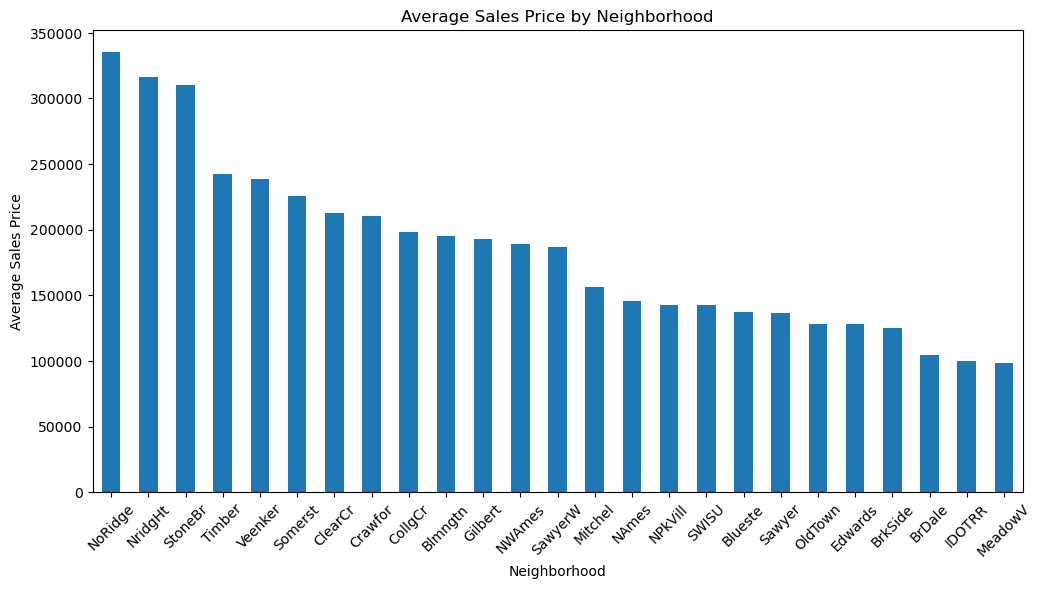

<IPython.core.display.Javascript object>

In [26]:
# Calculate the average sales price per neighborhood
neighborhood_prices = full_df.groupby("Neighborhood")["SalePrice"].mean()

# Sort the neighborhoods by average sales price in descending order
neighborhood_prices = neighborhood_prices.sort_values(ascending=False)

# Plot the average sales price per neighborhood
plt.figure(figsize=(12, 6))
neighborhood_prices.plot(kind="bar")
plt.xlabel("Neighborhood")
plt.ylabel("Average Sales Price")
plt.title("Average Sales Price by Neighborhood")
plt.xticks(rotation=45)
plt.show()

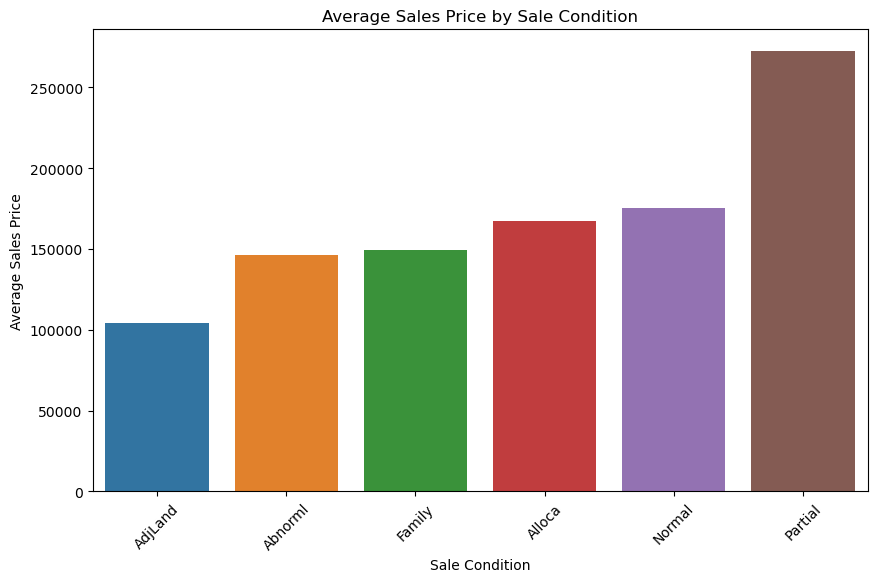

<IPython.core.display.Javascript object>

In [27]:
# Group the data by "SaleCondition" and calculate the mean sales price
avg_sales_price = full_df.groupby("SaleCondition")["SalePrice"].mean().sort_values()

# Plot the average sales prices
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_sales_price.index, y=avg_sales_price.values)
plt.title("Average Sales Price by Sale Condition")
plt.xlabel("Sale Condition")
plt.ylabel("Average Sales Price")
plt.xticks(rotation=45)
plt.show()

Partial is much higher than the rest of the prices however partial is also aligned with new construction houses which will typically sell for more money so this makes sense

In [28]:
encoded_df.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,2919.0,57.137718,42.517628,20.0,20.0,50.0,70.0,190.0
LotFrontage,2433.0,69.305795,23.344905,21.0,59.0,68.0,80.0,313.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
LandSlope,2919.0,0.053786,0.248750,0.0,0.0,0.0,0.0,2.0
OverallQual,2919.0,6.089072,1.409947,1.0,5.0,6.0,7.0,10.0
OverallCond,2919.0,5.564577,1.113131,1.0,5.0,5.0,6.0,9.0
YearBuilt,2919.0,1971.312778,30.291442,1872.0,1953.5,1973.0,2001.0,2010.0
YearRemodAdd,2919.0,1984.264474,20.894344,1950.0,1965.0,1993.0,2004.0,2010.0
MasVnrArea,2896.0,102.201312,179.334253,0.0,0.0,0.0,164.0,1600.0
ExterQual,2919.0,2.396711,0.580293,1.0,2.0,2.0,3.0,4.0


<IPython.core.display.Javascript object>

In [29]:
# Turn yearsold column into Year type

encoded_df["YrSold"] = pd.to_datetime(encoded_df["YrSold"], format="%Y")
encoded_df["YrSold"] = encoded_df["YrSold"].dt.year

<IPython.core.display.Javascript object>

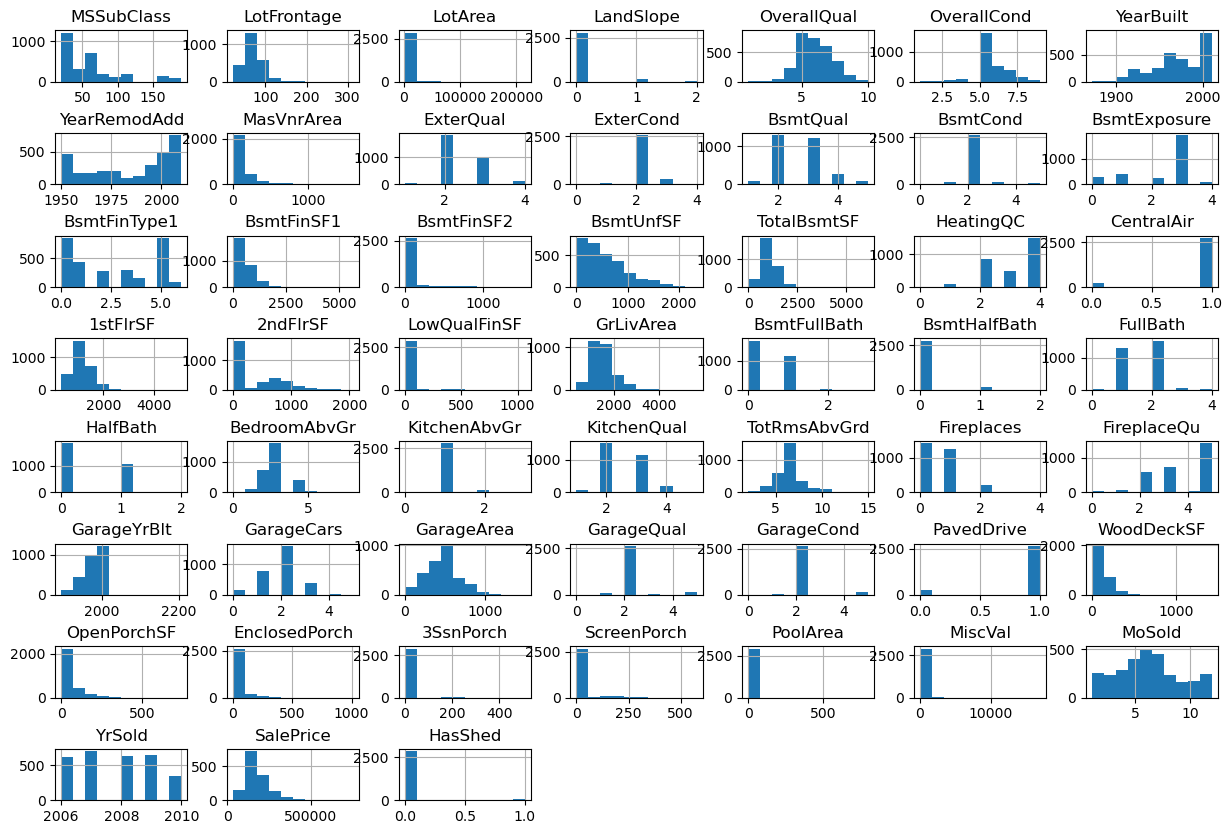

<IPython.core.display.Javascript object>

In [30]:
# Hist graphs for all numerical features
encoded_df.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=1)

In [31]:
# show entry for row with max lot area size

row = encoded_df[encoded_df["LotArea"] == 215245].T
print(row)

Id                  314
MSSubClass           20
MSZoning             RL
LotFrontage       150.0
LotArea          215245
LotShape            IR3
...                 ...
YrSold             2009
SaleType             WD
SaleCondition    Normal
SalePrice      375000.0
HasShed               0

[70 rows x 1 columns]


<IPython.core.display.Javascript object>

In [32]:
# Filter for rows with lot area over 100,000

encoded_df[encoded_df["LotArea"] > 100000]

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HasShed
Id,,,,,,,,,,,,,,,,,,,,,
250,50,RL,NaN,159000,IR2,CulDSac,2.0,ClearCr,Norm,1Fam,...,0,0,NaN,500,6,2007,WD,Normal,277000.0,1
314,20,RL,150.0,215245,IR3,Inside,2.0,Timber,Norm,1Fam,...,0,0,NaN,0,6,2009,WD,Normal,375000.0,0
336,190,RL,NaN,164660,IR1,Corner,2.0,Timber,Norm,2fmCon,...,0,0,NaN,700,8,2008,WD,Normal,228950.0,1
707,20,RL,NaN,115149,IR2,CulDSac,2.0,ClearCr,Norm,1Fam,...,0,0,NaN,0,6,2007,WD,Normal,302000.0,0


<IPython.core.display.Javascript object>

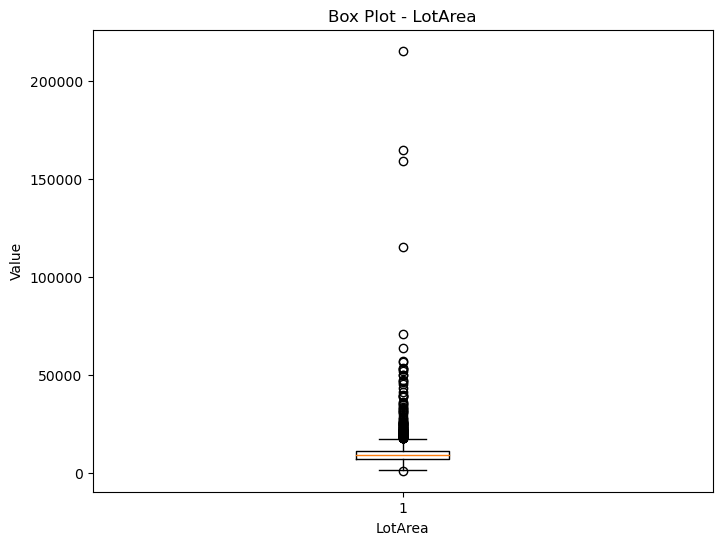

<IPython.core.display.Javascript object>

In [33]:
# Plot to show lot area distribution
plt.figure(figsize=(8, 6))
plt.boxplot(encoded_df["LotArea"])
plt.xlabel("LotArea")
plt.ylabel("Value")
plt.title("Box Plot - LotArea")
plt.show()

# Handling Remaining Missing Values

Any remaining missing values are addressed in this section. Columns with missing values that are not related to the target variable 'SalePrice' are filled with appropriate values.

In [34]:
# Count of all null values in each column only showing columns with at least 1 missing value
null_counts = encoded_df.isnull().sum()
columns_with_null = null_counts[null_counts > 0]

<IPython.core.display.Javascript object>

In [35]:
# Iterate over the columns with null values
for column in columns_with_null.index:
    if encoded_df[column].dtype == "object":
        encoded_df[column] = encoded_df[column].fillna(value="NaN")

<IPython.core.display.Javascript object>

In [36]:
# Iterate over the columns with null values
for column in columns_with_null.index:
    if column != "SalePrice" and encoded_df[column].dtype != "object":
        encoded_df[column] = encoded_df[column].fillna(0)

<IPython.core.display.Javascript object>

In [37]:
null_counts = encoded_df.isnull().sum()
columns_with_null = null_counts[null_counts > 0]
print(columns_with_null)

SalePrice    1459
dtype: int64


<IPython.core.display.Javascript object>

# Feature Engineering and Encoding

Non-quantitative features are identified, and dummy variables are created using one-hot encoding. These dummy variables are then concatenated with the original dataset, and the original non-quantitative features are dropped.

In [38]:
# Find non-quantitative features
non_quant_features = []
for col in encoded_df.columns:
    if not np.issubdtype(encoded_df[col].dtype, np.number):
        non_quant_features.append(col)

# Create a temporary DataFrame with non-quantitative features
temp_df = encoded_df[non_quant_features]

# Apply get_dummies on each non-quantitative feature
dummy_cols = pd.get_dummies(temp_df)

# Concatenate the dummy columns to the original DataFrame
new_df = pd.concat([encoded_df, dummy_cols], axis=1)

# Drop the original non-quantitative features
new_df.drop(non_quant_features, axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [39]:
# Check for null values in the "SalePrice" column
null_values = new_df["SalePrice"].isnull().sum()
print("Number of null values in the 'SalePrice' column:", null_values)

Number of null values in the 'SalePrice' column: 1459


<IPython.core.display.Javascript object>

In [40]:
# Removing outliers above 400k sales price without removing nulls
num_rows_above_400k = len(new_df[new_df["SalePrice"] > 400000])
print("Number of rows with sales price above $400,000:", num_rows_above_400k)

# Filter the rows based on "SalePrice" value without removing nulls
new_df = new_df.loc[new_df["SalePrice"].isnull() | (new_df["SalePrice"] <= 400000)]

Number of rows with sales price above $400,000: 28


<IPython.core.display.Javascript object>

In [41]:
# confirm no more quantitative features
non_quant_features = []
for col in new_df.columns:
    if not np.issubdtype(new_df[col].dtype, np.number):
        non_quant_features.append(col)

non_quant_features

[]

<IPython.core.display.Javascript object>

In [42]:
# Check for null values in the "SalePrice" column
null_values = new_df["SalePrice"].isnull().sum()
print("Number of null values in the 'SalePrice' column:", null_values)

Number of null values in the 'SalePrice' column: 1459


<IPython.core.display.Javascript object>

# Dataset Split and Saving

The final step involves splitting the dataset into a full dataset and separate training and test sets based on the presence or absence of 'SalePrice' values. These datasets are saved as CSV files for further use in model training and evaluation.

In [43]:
# Save datasets. One full data set and then a new test and train split based on sales price being null or not

new_df.to_csv("full_dataset.csv", index=False)

training_set = new_df[new_df["SalePrice"].notnull()]
training_set.to_csv("new_training_set.csv", index=False)

test_set = new_df[new_df["SalePrice"].isnull()]
test_set.to_csv("new_test_set.csv", index=False)

<IPython.core.display.Javascript object>